<a href="https://colab.research.google.com/github/inuneko89/DADS_6003/blob/main/Week05-Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ultimatepython.co/post/python-yahoo-finance

In [28]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance


In [40]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib


--2024-02-14 08:18:52--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-14 08:18:52--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-14 08:18:52--  http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving nchc.dl.sourceforge.n

In [36]:
!pip install pythainlp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 17.9 MB/s eta 0:00:00


In [41]:
!pip install TA-Lib


In [63]:
pip install scikit-learn

In [126]:
import yfinance as yf

In [217]:
tesla = yf.Ticker('brk-b')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
df = tesla.history(interval=interval,start=start,end=end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,309.899994,312.385010,308.899994,310.279999,852803,0.0,0.0
2023-01-03 10:30:00-05:00,310.359985,311.219910,308.570007,309.111603,309200,0.0,0.0
2023-01-03 11:30:00-05:00,309.170013,309.170013,307.920898,308.220001,253184,0.0,0.0
2023-01-03 12:30:00-05:00,308.200012,309.154999,307.490997,308.010010,230807,0.0,0.0
2023-01-03 13:30:00-05:00,307.989990,308.700012,307.380005,308.195007,208427,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,356.700012,356.989990,355.510010,355.670013,212870,0.0,0.0
2023-12-29 12:30:00-05:00,355.713989,356.059906,355.309998,355.489990,261654,0.0,0.0
2023-12-29 13:30:00-05:00,355.463501,356.079987,355.429993,355.820007,299533,0.0,0.0


In [218]:
import numpy as np
import pandas as pd

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score,train_test_split

# Data fetching
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


In [219]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)

X = df.iloc[:,:9]

In [220]:
X

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr
Datetime,,,,,,,,,
2023-01-03 09:30:00-05:00,309.899994,312.385010,308.899994,310.279999,852803,0.0,0.0,NaN,NaN
2023-01-03 10:30:00-05:00,310.359985,311.219910,308.570007,309.111603,309200,0.0,0.0,NaN,NaN
2023-01-03 11:30:00-05:00,309.170013,309.170013,307.920898,308.220001,253184,0.0,0.0,NaN,NaN
2023-01-03 12:30:00-05:00,308.200012,309.154999,307.490997,308.010010,230807,0.0,0.0,NaN,NaN
2023-01-03 13:30:00-05:00,307.989990,308.700012,307.380005,308.195007,208427,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,356.700012,356.989990,355.510010,355.670013,212870,0.0,0.0,357.542001,-0.365859
2023-12-29 12:30:00-05:00,355.713989,356.059906,355.309998,355.489990,261654,0.0,0.0,357.341000,-0.389754
2023-12-29 13:30:00-05:00,355.463501,356.079987,355.429993,355.820007,299533,0.0,0.0,357.165002,-0.316165


In [221]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [222]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [231]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ตรวจสอบและลบข้อมูลที่ไม่เหมาะสม
valid_indices = np.isfinite(X_train).all(axis=1) & np.isfinite(y_train)

X_train = X_train[valid_indices]
y_train = y_train[valid_indices]

# แบ่งข้อมูลเป็นชุด train และ test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# สร้างและฝึกโมเดล Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [232]:
probability = model.predict_proba(X_test)
probability

array([[0.48121945, 0.51878055],
       [0.47272682, 0.52727318],
       [0.4862658 , 0.5137342 ],
       [0.47862169, 0.52137831],
       [0.47424263, 0.52575737],
       [0.47662632, 0.52337368],
       [0.47200319, 0.52799681],
       [0.47174758, 0.52825242],
       [0.5010535 , 0.4989465 ],
       [0.4803918 , 0.5196082 ],
       [0.47204919, 0.52795081],
       [0.47029424, 0.52970576],
       [0.49109326, 0.50890674],
       [0.4725729 , 0.5274271 ],
       [0.47757409, 0.52242591],
       [0.48163216, 0.51836784],
       [0.47438241, 0.52561759],
       [0.51527548, 0.48472452],
       [0.47496558, 0.52503442],
       [0.47523056, 0.52476944],
       [0.47348858, 0.52651142],
       [0.47565543, 0.52434457],
       [0.47911638, 0.52088362],
       [0.47321067, 0.52678933],
       [0.48947603, 0.51052397],
       [0.48103666, 0.51896334],
       [0.48345767, 0.51654233],
       [0.48556325, 0.51443675],
       [0.47150047, 0.52849953],
       [0.47185403, 0.52814597],
       [0.

In [233]:
probability = model.predict_proba(X_test)
print(probability)

predicted = model.predict(X_test)

[[0.48121945 0.51878055]
 [0.47272682 0.52727318]
 [0.4862658  0.5137342 ]
 [0.47862169 0.52137831]
 [0.47424263 0.52575737]
 [0.47662632 0.52337368]
 [0.47200319 0.52799681]
 [0.47174758 0.52825242]
 [0.5010535  0.4989465 ]
 [0.4803918  0.5196082 ]
 [0.47204919 0.52795081]
 [0.47029424 0.52970576]
 [0.49109326 0.50890674]
 [0.4725729  0.5274271 ]
 [0.47757409 0.52242591]
 [0.48163216 0.51836784]
 [0.47438241 0.52561759]
 [0.51527548 0.48472452]
 [0.47496558 0.52503442]
 [0.47523056 0.52476944]
 [0.47348858 0.52651142]
 [0.47565543 0.52434457]
 [0.47911638 0.52088362]
 [0.47321067 0.52678933]
 [0.48947603 0.51052397]
 [0.48103666 0.51896334]
 [0.48345767 0.51654233]
 [0.48556325 0.51443675]
 [0.47150047 0.52849953]
 [0.47185403 0.52814597]
 [0.47183404 0.52816596]
 [0.47115001 0.52884999]
 [0.48187752 0.51812248]
 [0.47889592 0.52110408]
 [0.47540115 0.52459885]
 [0.4847928  0.5152072 ]
 [0.47050474 0.52949526]
 [0.4751064  0.5248936 ]
 [0.4877746  0.5122254 ]
 [0.50820695 0.49179305]


In [234]:
print(metrics.confusion_matrix(y_test, predicted))

[[  4 126]
 [  3 155]]


In [235]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.57      0.03      0.06       130
           1       0.55      0.98      0.71       158

    accuracy                           0.55       288
   macro avg       0.56      0.51      0.38       288
weighted avg       0.56      0.55      0.41       288



In [236]:
print(model.score(X_test,y_test))
0.528

0.5520833333333334


0.528

In [237]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# สร้าง SimpleImputer
imputer = SimpleImputer(strategy='mean')

# แทนที่ค่าที่หายไปใน X ด้วยค่าเฉลี่ยของแต่ละคอลัมน์
X_imputed = imputer.fit_transform(X)

# ใช้ cross-validation เพื่อประเมินโมเดล
cross_val = cross_val_score(LogisticRegression(), X_imputed, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())


[0.53142857 0.46285714 0.52298851 0.53448276 0.52873563 0.51149425
 0.53448276 0.52873563 0.53448276 0.54597701]
0.5235665024630543


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


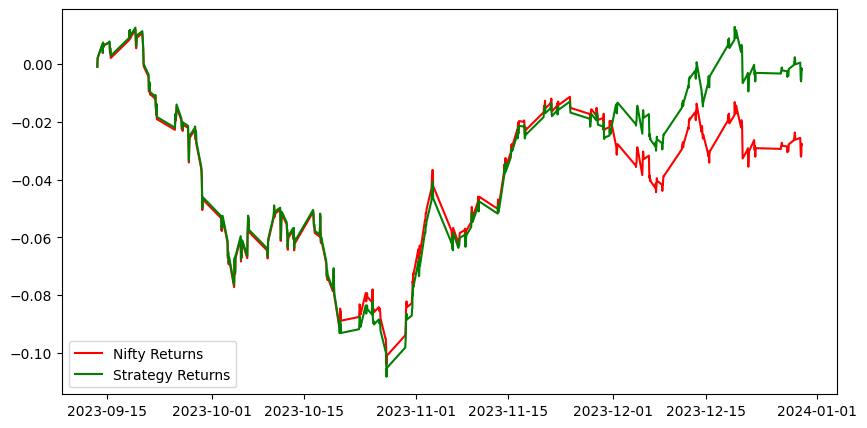

In [238]:
from sklearn.impute import SimpleImputer

# สร้าง SimpleImputer
imputer = SimpleImputer(strategy='mean')

# แทนที่ค่าที่หายไปใน X ด้วยค่าเฉลี่ยของแต่ละคอลัมน์
X_imputed = imputer.fit_transform(X)

# ทำนายสัญญาณด้วยโมเดล Logistic Regression
predicted_signal = model.predict(X_imputed)

# เพิ่มคอลัมน์ Predicted_Signal ใน DataFrame
df['Predicted_Signal'] = predicted_signal

# คำนวณผลตอบแทนของ Nifty
df['Nifty_returns'] = np.log(df['Close'] / df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['Nifty_returns'])

# คำนวณผลตอบแทนของกลยุทธ์
df['Strategy_returns'] = df['Nifty_returns'] * df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])

# พล็อตกราฟ
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()


In [239]:
from sklearn.metrics import mean_squared_error

# ทำนายสัญญาณในชุดข้อมูลทดสอบ
predicted_signals_test = model.predict(X_test)

# คำนวณ MSE
mse = mean_squared_error(y_test, predicted_signals_test)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.7916666666666667
